In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [25]:
def all_pairs(nodes):
    for i,u in enumerate(nodes):
        for j,v in enumerate(nodes):
            if i<j:
                yield u,v

In [26]:
def make_complete_graph(n):
    G=nx.Graph()
    nodes=range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

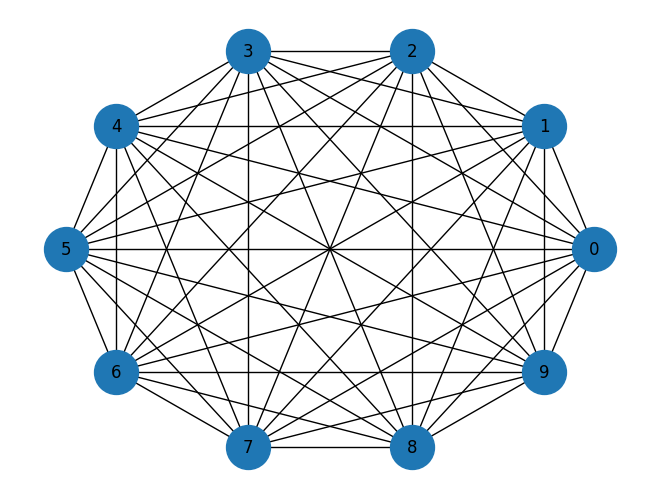

In [38]:
complete_G=make_complete_graph(10)
def draw_circular_graph(G):
    nx.draw_circular(G,
                    node_color='tab:blue',
                    node_size=1000,
                    with_labels=True
                    )
draw_circular_graph(complete_G)

In [28]:
print(list(complete_G.neighbors(0)))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [29]:
def reachable_nodes(G,start):
    seen=set()
    stack=[start]
    while stack:
        node=stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In [30]:
reachable_nodes(complete_G,0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [31]:
def is_connected(G):
    start=next(iter(G))
    reachable=reachable_nodes(G,start)
    return len(reachable)==len(G)

In [32]:
is_connected(complete_G)

True

In [33]:
def flip(p):
    return np.random.random()<p

In [34]:
def random_pairs(nodes,p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

In [35]:
def make_random_graph(n,p):
    G=nx.Graph()
    nodes=range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes,p))
    return G

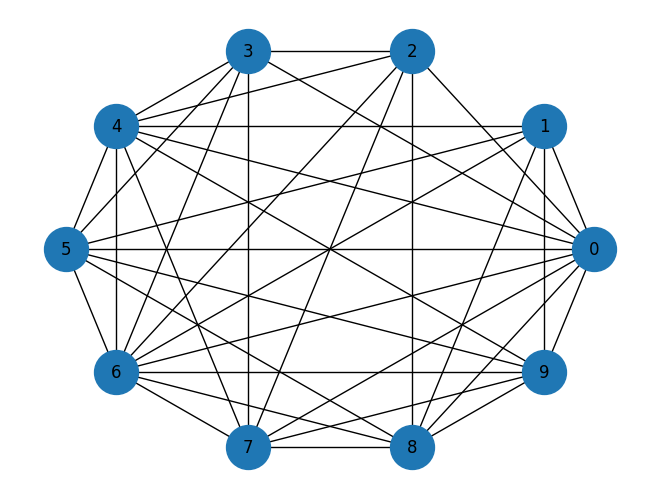

In [41]:
random_graph=make_random_graph(10,0.8)
draw_circular_graph(random_graph)

In [43]:
def prob_connected(n,p,iters=100):
    tf=[is_connected(make_random_graph(n,p)) for i in range(iters)]
    return np.mean(tf)
prob_connected(10,0.23,iters=1000)

0.348

In [44]:
n=10
ps=np.logspace(-2.5,0,11)
ys=[prob_connected(n,p) for p in ps]

In [45]:
print(ys)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.08, 0.77, 1.0, 1.0]
